# Customer Analysis Final Round


- **01 - Problem (case study)**
    - Data Description.
    - Goal.
    
- **02 - Getting Data**
    - Read the .csv file.
    
- **03 - Cleaning/Wrangling/EDA**
    - Change headers names.
    - Deal with NaN values.
    - Categorical Features.
    - Numerical Features.
    - Exploration.
    
- **04 - Processing Data**
    - Dealing with outliers.
    - Normalization.
    - Encoding Categorical Data.
    - Splitting into train set and test set.
    
- **05 - Modeling**
    - Apply model.
    
- **06 - Model Validation**
    - R2.
    - MSE.
    - RMSE.
    - MAE.
    
- **07 - Reporting**
    - Present results.

## 01 - Problem (case study)

The following dataset is utilized for the Insurance company's cutomer analysis.
The main objective is to investigate the dynamics of customer behaviours. Particularly, this analysis will explore the specific features that increase the cutomer's claims.


**Goal**: To identify features influencing the volume of insurance claims (i.e. total amount of claims)




### Variable Description: 

- **Customer**
- **State**: 'Washington' 'Arizona' 'Nevada' 'California' 'Oregon'
- **Customer Lifetime Value**: a measure of the average customer’s revenue generated over their entire relationship with a company. That is, customer’s profitability and the business’s potential for long-term growth.
- **Response**: Do you want to renew the contract? (Responded Marketing call?)- 'No' 'Yes' 
- **Coverage**: Product Coverage - 'Basic' 'Extended' 'Premium'
- **Education**: 'Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'
- **Effective To Date**: Policy effective date
- **EmploymentStatus**: 'Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'
- **Gender**: 'F', 'M'
- **Income**: customer's avg annual income
- **Location Code**: 'Suburban' 'Rural' 'Urban'
- **Marital Status**: 'Married' 'Single' 'Divorced'
- **Monthly Premium Auto**: the average monthly payment
- **Months Since Last Claim**: the number of months since the last claim
- **Months Since Policy Inception**: the number of months since the product went into effect
- **Number of Open Complaints**: the number of open claims
- **Number of Policie**
- **Policy Type**: 'Corporate Auto' 'Personal Auto' 'Special Auto'
- **Policy**: 'Policy level of each product type (L1, L2, L3)- Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2' 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3'
- **Renew Offer Type**: 'Offer1' 'Offer3' 'Offer2' 'Offer4'
- **Sales Channel**: 'Agent' 'Call Center' 'Web' 'Branch'
- **Total Claim Amount**: Cumulative claim amount
- **Vehicle Class**: 'Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car' 'Luxury Car'
- **Vehicle Size'**: 'Medsize' 'Small' 'Large'

In [139]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

## 02 - Getting Data

Read the .csv file.

In [140]:
folder_path = "/Users/dooinnkim/ironhack_da_may_2023/lab-customer-analysis-final-round/files_for_lab/csv_files/"

file_names = os.listdir(folder_path)

file_names

['marketing_customer_analysis.csv']

In [141]:
for file_name in file_names:
  print(folder_path + file_name) 
  display(pd.read_csv(folder_path + file_name).head(5)) 
  print()

/Users/dooinnkim/ironhack_da_may_2023/lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [142]:

df = pd.DataFrame()

for file_name in file_names:
  df_temp = pd.read_csv(folder_path + file_name)
  df = pd.concat([df, df_temp])

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [143]:
df.shape

(9134, 24)

In [144]:
df = df.drop_duplicates()

In [145]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [146]:
df.shape

(9134, 24)

In [147]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [148]:
df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 24 columns):
customer                         9134 non-null object
state                            9134 non-null object
customer_lifetime_value          9134 non-null float64
response                         9134 non-null object
coverage                         9134 non-null object
education                        9134 non-null object
effective_to_date                9134 non-null object
employmentstatus                 9134 non-null object
gender                           9134 non-null object
income                           9134 non-null int64
location_code                    9134 non-null object
marital_status                   9134 non-null object
monthly_premium_auto             9134 non-null int64
months_since_last_claim          9134 non-null int64
months_since_policy_inception    9134 non-null int64
number_of_open_complaints        9134 non-null int64
number_of_policies               

In [152]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical = df_categorical.drop(['customer','effective_to_date'], axis=1)

In [153]:
df_numerical = df.select_dtypes(include=['float64','int64'])
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### Categorical Features exploration

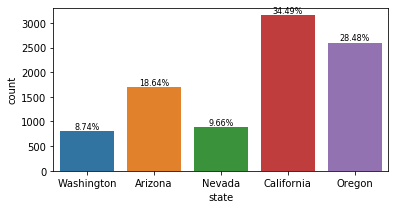

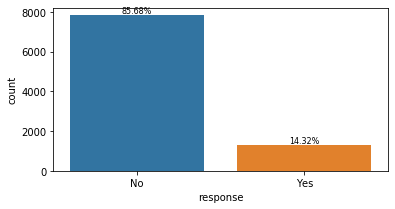

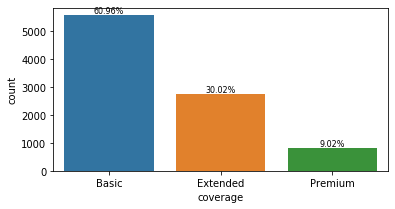

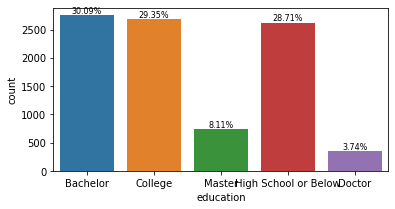

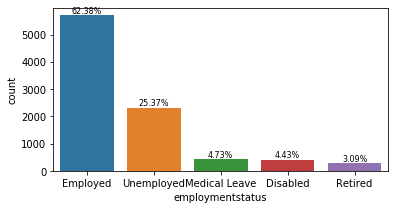

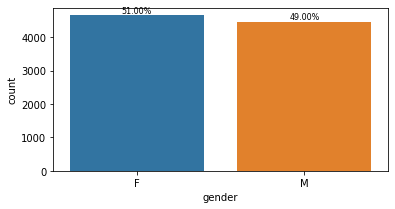

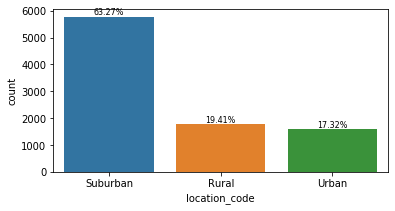

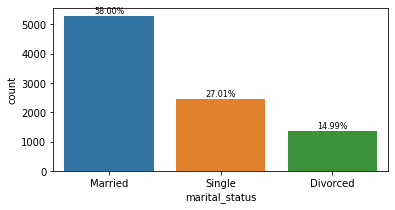

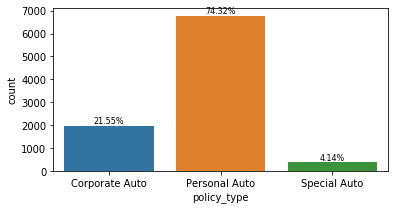

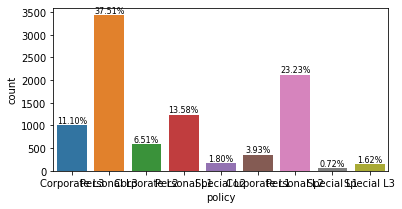

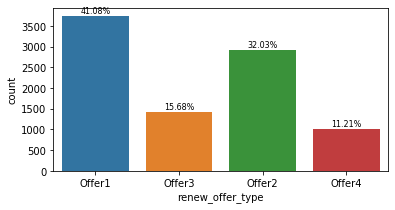

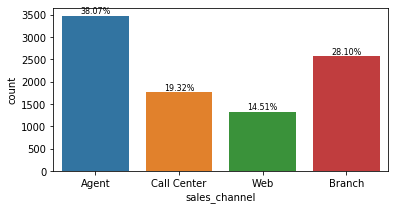

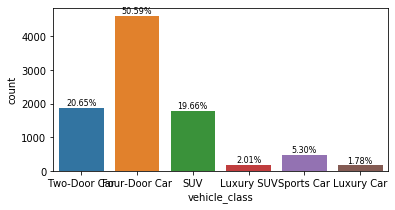

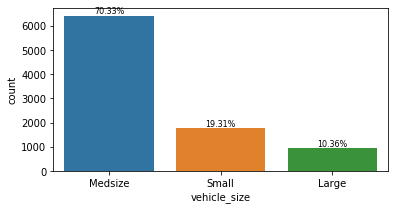

In [154]:
# To verify the distribution of categorical variables with countpot

for column in df_categorical.columns:
    plt.figure(figsize=(6, 3))
    ax = sns.countplot(x=column, data=df_categorical)

    total = len(df_categorical[column])
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

    plt.show()



According to the countplot presented above, we've discovred some noticible information from the categocial variables.

- State: california and oregan are the major states where most of customer concentrated.
- Response: the number of customers who consider not to renew the insurance contract is predominont (i.e. No)
- Coverage: the most popular coverage insurance is 'Basic'. 'Extended' and 'Premium' are followed.
- Education: Highshool, College, Bachelor holders are more or less similar in numbers. Wherease, master and Doctor holders are relative very low number
- Employment status: majority of customers are employed
- Gender: There is no big difference in Gender distribution of the customer
- Location: Majority of customer live in suburman
- Merital status: one-third of customer are maried.
- Policy type: the number of peronal auto is predominant
- Sales channel: most of sales channle done via Agent and brance
- Vehicle class: Four-door car is the most common type that customers drive
- Vehicle size: majority of vehicles are medsize.


### Numerical Features exploration

In [194]:
df_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


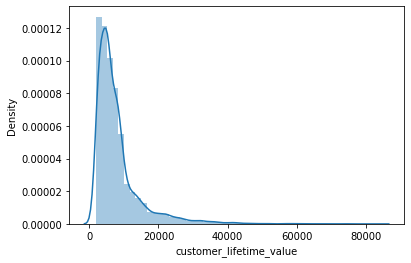

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


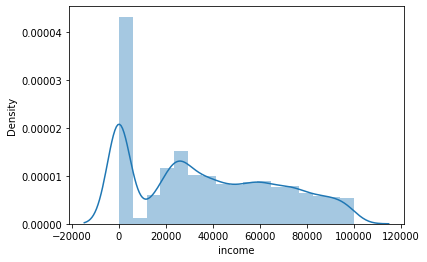

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


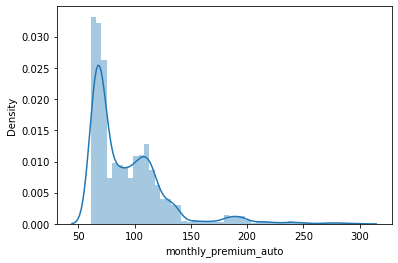

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


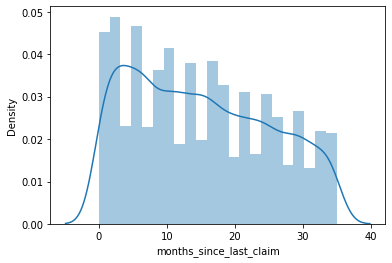

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


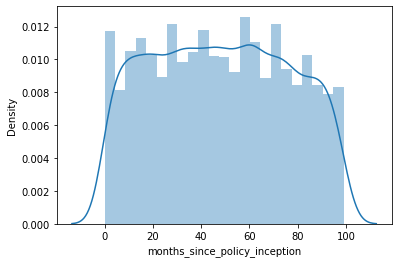

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


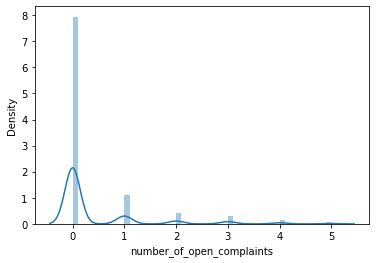

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


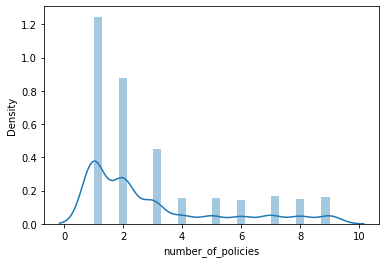

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


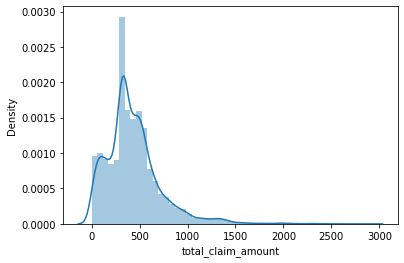

In [207]:
# Distribution of contiuous variables.

# df_numerical.hist(figsize=(14, 8))
# plt.suptitle("Histograms of Numerical Columns")
# plt.tight_layout()
# plt.show()

for col in df_numerical.columns:
  sns.distplot(df_numerical[col])
  plt.show()

It looks only customer lifetime value is normally distributed

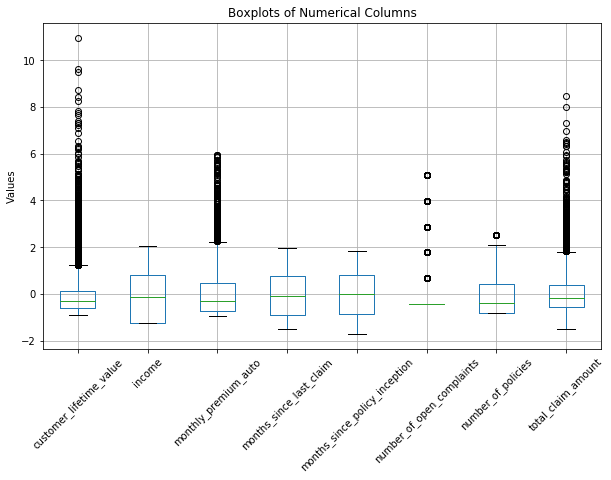

In [156]:
scaler = StandardScaler()

# Apply Z-score normalization to the DataFrame
df_numerical_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

df_numerical_normalized.boxplot(figsize=(10, 6))

# Set titles and labels
plt.title("Boxplots of Numerical Columns")
plt.ylabel("Values")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

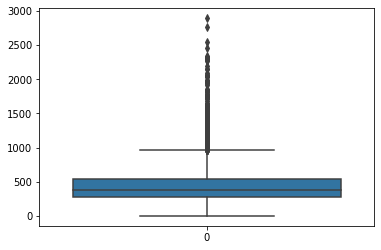

In [157]:
# target value investigation

sns.boxplot(df_numerical["total_claim_amount"])

In [160]:
df_numerical_corr = df_numerical.corr()
df_numerical_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [161]:
df_numerical_corr["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

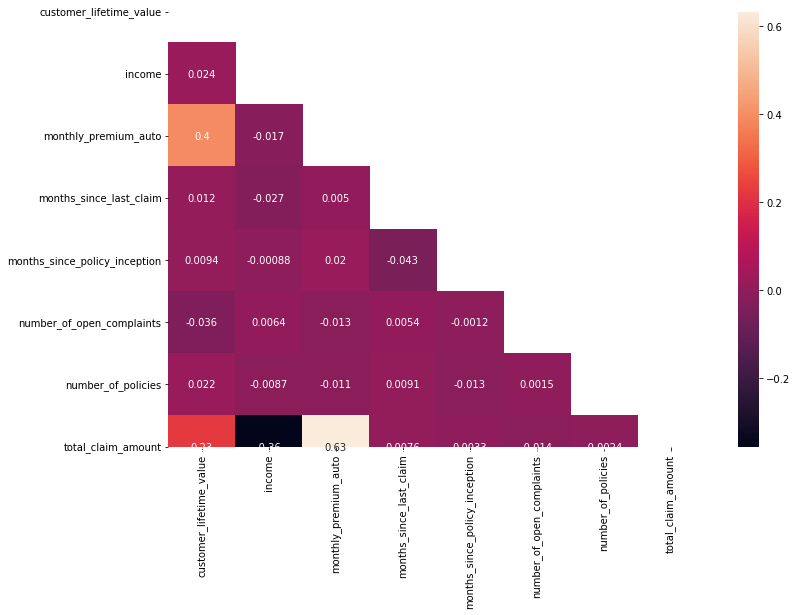

In [162]:
mask = np.zeros_like(df_numerical_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_numerical_corr, mask=mask, annot=True, ax=ax)
plt.show()

According to the correlatio matraix above, total_claim amount and monthly_premium_auto are highly correlated and then customer_lifetime value. 

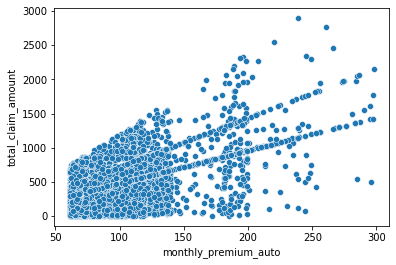

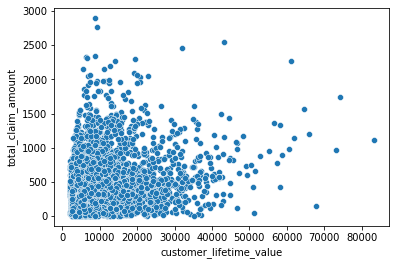

In [214]:
# Only highly correlated features with total_claim_amount presented as scatter plots.
cols = ['monthly_premium_auto', 'customer_lifetime_value']
for col in cols: 
    sns.scatterplot(x=col, y="total_claim_amount", data=df_numerical)
    plt.show()

In [158]:
# To identify outliers of total_claim_amount
IQR = abs(np.quantile(df_numerical["total_claim_amount"], .25) - np.quantile(df_numerical["total_claim_amount"], .75)) * 1.5
lower_boundary = np.quantile(df_numerical["total_claim_amount"], .25) - IQR
upper_boundary = np.quantile(df_numerical["total_claim_amount"], .75) + IQR

lower_boundary, upper_boundary

(-140.62664687500018, 960.3997301250002)

In [159]:
print("min:", df_numerical["total_claim_amount"].min())
print("max:",df_numerical["total_claim_amount"].max())
print("median:",df_numerical["total_claim_amount"].median())
print("mean:",df_numerical["total_claim_amount"].mean())


min: 0.09900700000000001
max: 2893.239678
median: 383.94543350000004
mean: 434.0887943128942


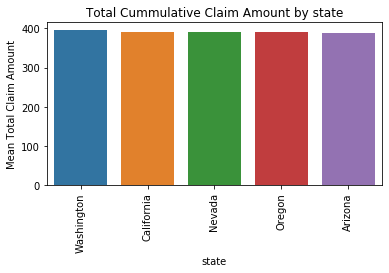

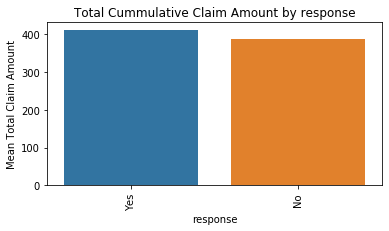

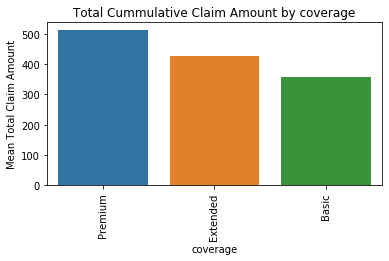

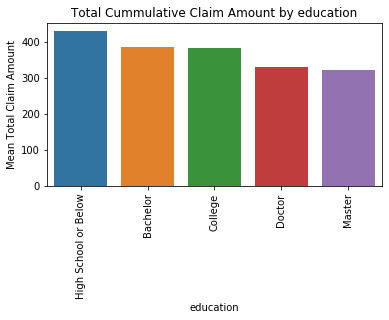

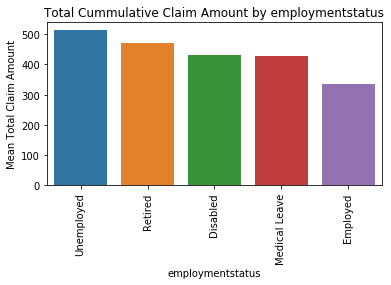

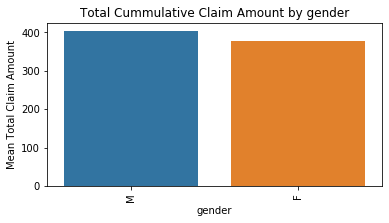

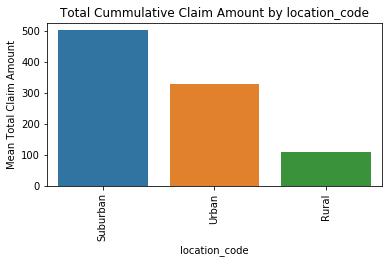

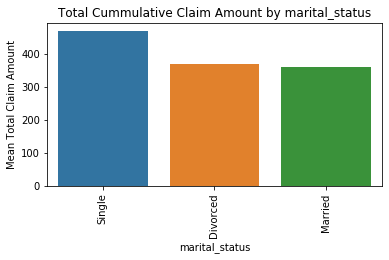

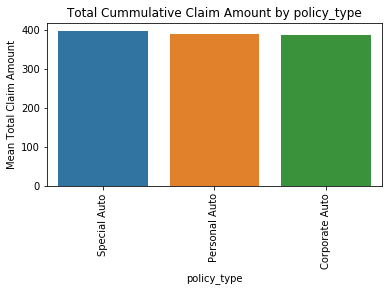

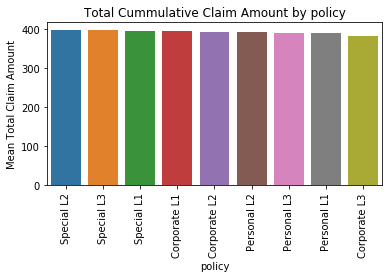

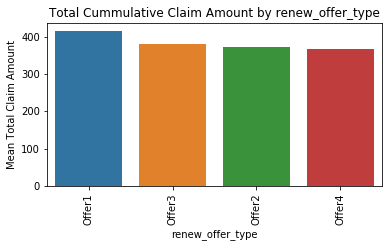

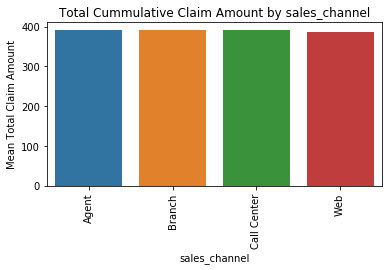

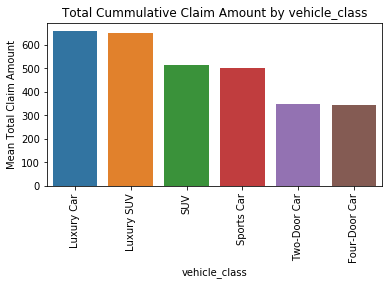

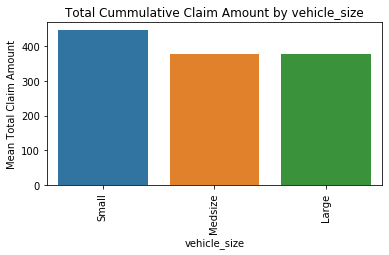

In [206]:
# Dynamics of the relationship between total_claim_amount and Categorical variables.


# removed outliers of total claim amount to observe the tendency
no_outliers = df[df["total_claim_amount"] < 960.3997301250002]
object_cols = ['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']

for col in object_cols:
    mean_values = no_outliers.groupby(col)['total_claim_amount'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(6, 3))  
    sns.barplot(x=mean_values.index, y=mean_values.values)  
    plt.title(f'Total Cummulative Claim Amount by {col}') 
    plt.xlabel(col)  
    plt.ylabel('Mean Total Claim Amount')  
    plt.xticks(rotation=90)  
    plt.show()  

Finds : Dynamics of the relationship between total_claim_amount and Categorical variables.

- It is interesting to see that the customer with the following specific informations (small vehicle, Luxury Car, Luxury SUV, Single, Suburban, Unemployed/Retried, Higshcoole or Below, Premium) tend to have more claims.

- It seems that sales channel, renew offer type, policy, gender, renewal response, state do not give any motivating factors for claims by customers


## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

## 05 - Modeling

- Apply model.

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### Regression Analysis Models

Different models are tested to find the best model. It's turned out Model 9 is the best linear regression model to predict the claim amount of a customer.

- Model 1. All features
- Model 2. All features (logscaled)
- Model 3. All features(outliers removed)
- Model 4. All features(outliers removed & logscaled)
- Model 5. Only Continouis variables
- Model 6. Only Continous variables (but higly correlated:  (i.e. 'monthly_premium_auto','income','customer_lifetime_value'))
- Model 7. Highly correlated contiuous variables + all categorical variables
- Model 8. Model 7 + loagscaled
- Model 9. Model 7 + outliers removed
- Model 10. Model 7 + outliers removed + loagscaled


##  Model1. All Features

In [163]:
df_model1 = df.copy()
df_model1 = df_model1.drop(['customer','effective_to_date'], axis=1)


In [164]:
df_model1 = pd.get_dummies(df_model1, drop_first=True)

In [165]:
df_model1.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0


In [216]:
X = df_model1.drop(['total_claim_amount'], axis=1)
y = df_model1['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)

# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)

R2_score: 0.77
RMSE: 138.50053189097795
MSE: 19182.397334083802
MAE: 94.52122056417772


## Model 2. All features (logscaled)

In [167]:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 



y_test_unscaled = y_test_scaled.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.73
RMSE: 130.64452834384423
MAE: 85.52775190023164


## Model 3. All Features (Outliers removed)

In [169]:
df_model3 = df.copy()
df_model3 = df_model3[df_model3["total_claim_amount"] < 960.3997301250002]
df_model3 = df_model3.drop(['customer','effective_to_date'], axis=1)


df_model3 = pd.get_dummies(df_model3, drop_first=True)
df_model3.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0
5,8256.297800,62902,69,14,94,0,2,159.383042,0,0,...,0,0,1,0,0,0,0,1,1,0


In [170]:
X = df_model3.drop(['total_claim_amount'], axis=1)
y = df_model3['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.78
RMSE: 99.74594764689826
MAE: 75.67697547212246


## Model 4. All features(outliers removed & logscaled)

In [171]:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 



y_test_unscaled = y_test_scaled.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.72
RMSE: 97.92833975956628
MAE: 72.2769795880611


## Model 5. Only Continouis variables

In [172]:

X = df_numerical.drop(['total_claim_amount'], axis=1)
y = df_numerical['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)


R2_score: 0.52
RMSE: 198.4183377461031
MAE: 143.0378893269738


## Model 6. Only Continous variables (but higly correlated: (i.e. 'monthly_premium_auto','income','customer_lifetime_value'))

In [175]:
X = df_numerical[['monthly_premium_auto','income','customer_lifetime_value','total_claim_amount']]
y = df_numerical['total_claim_amount']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 1.0
RMSE: 3.2252998681605056e-13
MAE: 2.4886945234761574e-13


##  Model 7. Highly correlated contiuous variables + all categorical variables

In [177]:
df_categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [185]:
model7 = df.copy()
model7 = model7[['monthly_premium_auto','income','customer_lifetime_value','total_claim_amount','state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']] 
model7 = pd.get_dummies(model7, drop_first=True)

In [182]:
X = model7.drop('total_claim_amount', axis=1)
y = model7['total_claim_amount']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.76
RMSE: 138.5384867362886
MAE: 94.56496622661354


##  Model 8. Model 7 (loagscaled)

In [183]:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 



y_test_unscaled = y_test_scaled.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.73
RMSE: 130.65100318485946
MAE: 85.54516507222054


## Model 9. Model 7 (outliers removed )

In [186]:
model9 = df.copy()
model9 = model9[model9["total_claim_amount"] < 960.3997301250002]
model9 = model9[['monthly_premium_auto','income','customer_lifetime_value','total_claim_amount','state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']] 


model9 = pd.get_dummies(model9, drop_first=True)

In [187]:
X = model9.drop('total_claim_amount', axis=1)
y = model9['total_claim_amount']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.78
RMSE: 99.52926175130222
MAE: 75.47392556261042


## Model 10. Model 7 (outliers removed + loagscaled)

In [188]:
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 



y_test_unscaled = y_test_scaled.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.72
RMSE: 97.78881914825608
MAE: 72.28226312321073


# 07 - Reporting

Present results.

- It is interesting to see that the customer with the following specific informations (small vehicle, Luxury Car, Luxury SUV, Single, Suburban, Unemployed/Retried, Higshcoole or Below, Premium) tend to have more claims.

- It seems that sales channel, renew offer type, policy, gender, renewal response, state do not give any motivating factors for claims by customers

- Total_claim amount and monthly_premium_auto are highly correlated and then customer_lifetime value. 

